<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/downloads/customer-segmentation-tutorial-in-python.zip/1

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from pandas import DataFrame
import pandas as pd
import io
RANDOM_SEED = 42

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
Mall_Customers = pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')), sep = ',')

In [5]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print('Shape of the Mall_Customers dataset: Rows, Columns')
Mall_Customers.shape

Shape of the Mall_Customers dataset: Rows, Columns


(200, 5)

In [9]:
print('Descriptive statistics of the Mall_Customers DataFrame:')
print(Mall_Customers.describe())

Descriptive statistics of the Mall_Customers DataFrame:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
Mall_Customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
Mall_Customers['Age_Range']='No Range'
Mall_Customers.loc[Mall_Customers['Age'].between(18, 24, inclusive = True), 'Age_Range'] = 'Under 25'
Mall_Customers.loc[Mall_Customers['Age'].between(25, 30, inclusive = True), 'Age_Range'] = 'Between 25 and 30'
Mall_Customers.loc[Mall_Customers['Age'].between(31, 40, inclusive = True), 'Age_Range'] = 'Between 31 and 40'
Mall_Customers.loc[Mall_Customers['Age'].between(41, 50, inclusive = True), 'Age_Range'] = 'Between 25 and 30'
Mall_Customers.loc[Mall_Customers['Age'].between(51, 60, inclusive = True), 'Age_Range'] = 'Between 51 and 60'
Mall_Customers.loc[Mall_Customers['Age'] > 60, 'Age_Range'] = 'Over 60'

In [13]:
Mall_Customers.unique_values()

AttributeError: ignored

In [0]:
Mall_Customers_big4_agg=DataFrame({'Air Quality Measure' : Mall_Customers_big4.groupby(['CountyName', 'ReportYear'])['Value'].sum()}).reset_index()

In [0]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

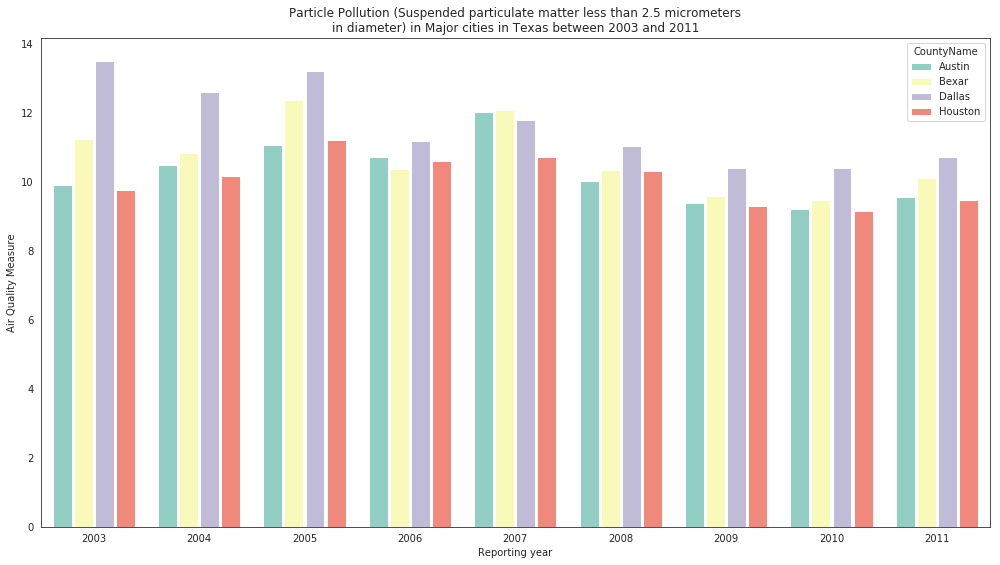

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
sns.set_style("white")

fig, ax = plt.subplots(figsize=(17,9))

g = sns.catplot(x="ReportYear", y="Air Quality Measure", hue="CountyName", data=Mall_Customers_big4_agg,
                kind="bar"#, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3"
                , ax=ax
                , legend=True
                , aspect=1.5
                , saturation=.85
                )

handles, labels = ax.get_legend_handles_labels()

ax.set_title("\n".join(wrap("Particle Pollution (Suspended particulate matter less than 2.5 micrometers in diameter) in Major cities in Texas between 2003 and 2011", 75)))

ax.set_xlabel('Reporting year')

#plt.legend(title='City', loc='upper right', labels=['Austin', 'San Antonio', 'Dallas', 'Houston'])
plt.close(g.fig)
change_width(ax, .18)
#plt.show(g)

Text(0.5, 0, 'City Name')

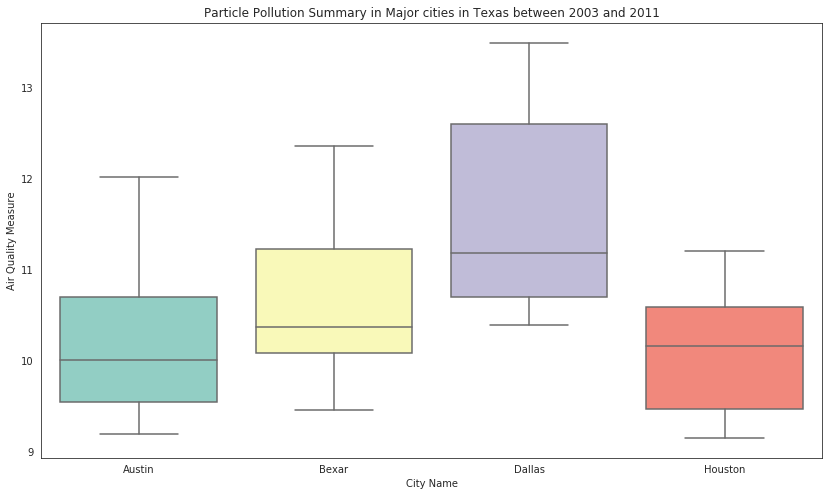

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(y="Air Quality Measure", x="CountyName", data=TX_Air_Quality_big4_agg
                #, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3", saturation=.85)
ax.set_title("\n".join(wrap("Particle Pollution Summary in Major cities in Texas between 2003 and 2011", 75)))
ax.set_xlabel('City Name')